In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Number of Training Samples is:', x_train.shape[0], '\nHight size of image is:', x_train.shape[1], '\nWidth size of image is:', x_train.shape[2])
print('-------------')
print('Number of Test Samples is:', x_test.shape[0], '\nHight size of image is:', x_test.shape[1], '\nWidth size of image is:', x_train.shape[2])

Number of Training Samples is: 60000 
Hight size of image is: 28 
Width size of image is: 28
-------------
Number of Test Samples is: 10000 
Hight size of image is: 28 
Width size of image is: 28


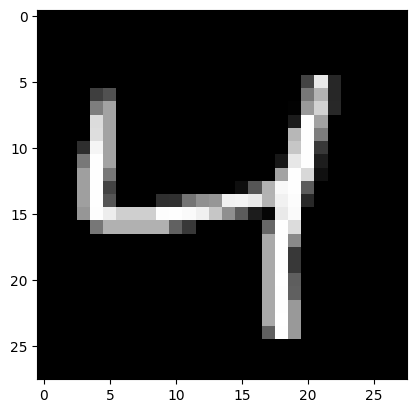

4


In [4]:
plt.imshow(x_train[2], cmap='gray')
plt.show()
print(y_train[2])

In [5]:
#Normalizing the data
z_train = x_train/255
x_test = x_test/255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras. layers.Dense(50, activation='relu'),
keras. layers.Dense(50, activation='relu'),
keras.layers.Dense(10, activation='Softmax')

])
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(z_train, y_train, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2900 - accuracy: 0.9170
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0826 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0681 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0517 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0465 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy:', round(accuracy*100,2) , '%')

313/313 [==============================] - 0s 847us/step - loss: 0.0936 - accuracy: 0.9745
Accuracy: 97.45 %


In [8]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 780us/step


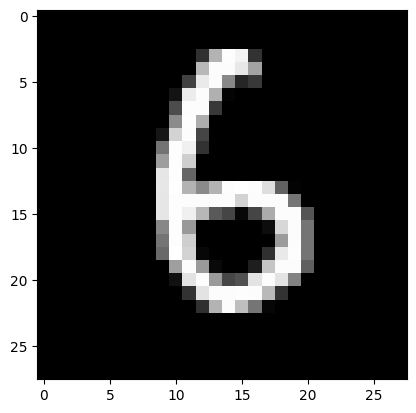

6

In [9]:
plt.imshow(x_test[21], cmap='gray')
plt.show()
y_test[21]

In [10]:
y_pred[21]

array([3.15840816e-06, 1.01123012e-08, 1.35146911e-06, 6.78313867e-08,
       9.56226245e-07, 5.07510209e-04, 9.99376595e-01, 3.95436295e-10,
       1.10410096e-04, 2.12243769e-08], dtype=float32)

In [11]:
# converting the prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[21])
label_for_first_image

6

In [12]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [13]:
random_index = np.random.randint(0, len(x_train))

# Get the random image and its label
random_image = x_train[random_index]
label = y_train[random_index]

# Create a PIL image from the numpy array
image = Image.fromarray(random_image)

# Save the image
image_path = f"random_digit_{label}.png"
image.save(image_path)

print(f"Random digit image of label {label} saved as {image_path}.")

Random digit image of label 0 saved as random_digit_0.png.
